In [3]:
%matplotlib inline

<a id='TOC'></a>
# Table of Contents
-  Supervised learning -Classification
    -  [Softmax with Logistic Regression ('Multinomial')](#softmax)
    -  [2-class classification](#classification)
        - [Data simulation](#classification_preparation)
        - [Learn a classifier](#classification_learn)
            -  [Decision tree](#classification_tree)
            - [Random Forest](#classification_RF)
            - [SVM classifier](#classification_svc)
            - [Adaboost](#classification_adaboost)
        - [Plot decision boundary of learnt classifier](#classification_result)
        - [Plot decision scores for some classifiers (ex: Adaboost , SVM)](#classification_result2)
-  Supervised learning -Regression
    -  [Tree Regression](#tree_regression)
    -  [SVM Regression](#svm_regression)
-  Unsupervised learning
    -  [Novelty detection with one-class SVM](#one_class)
<br>
-  __[My codes on Github](https://github.com/xianhong)__
<br>
`Monospace fonts`
Normal fonts
__Bold__
*Italic*


<a id='classification'></a>
# 2-class classification
[Go to the top](#TOC)

<a id='classification_preparation'></a>
## Simulation of data
[Go to the top](#TOC)

In [1]:
print(__doc__)

# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

import numpy as np

from sklearn.datasets import make_gaussian_quantiles


# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))


Automatically created module for IPython interactive environment


  <a id='classification_learn'></a>
## Learn a classifier
[Go to the top](#TOC)

<a id='classification_tree'></a>
## Decision tree 


In [2]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<a id='classification_RF'></a>
## Random forest 

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features=2,
                         n_estimators=200)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

<a id='classification_adaboost'></a>
## Adaboost 

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)
clf.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

<a id='classification_svc'></a>
## SVM classifier

In [21]:
from sklearn.svm import SVC
clf = SVC(cache_size=500)
#clf=SVC(kernel='poly',cache_size=500)
"""
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
"""
clf.fit(X, y)

SVC(C=1.0, cache_size=500, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<a id='classification_logistic'></a>
## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')

<a id='classification_result'></a>
## Plot decision boundary of learnt classifier
[Go to the top](#TOC)

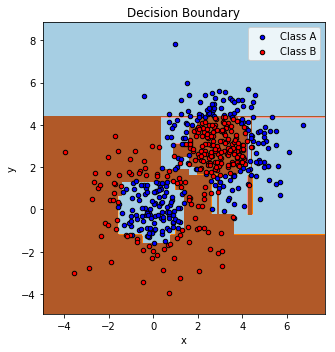

In [3]:
import matplotlib.pyplot as plt
plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

<a id='classification_result2'></a>
### Plot decision scores for some classifiers (ex:SVM , Adaboost)
[Go to the top](#TOC)

In [26]:


# Plot the two-class decision scores
twoclass_output = clf.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

<a id='softmax'></a>
#  Softmax -Logistic regression ('Multinomial')
[Go to the top](#TOC)







SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)



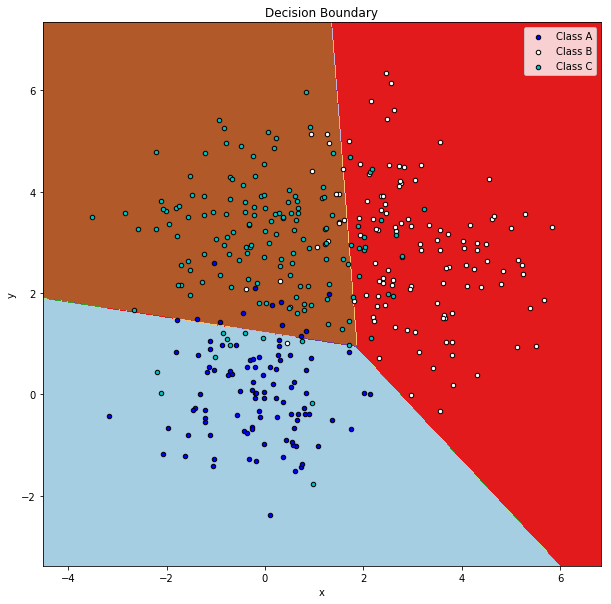

In [6]:
print(__doc__)

# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
mean=[0,0]
cov=[[1,0],[0,1]]
X1 = np.random.multivariate_normal(mean, cov, 100)
y1 = np.zeros((100,), dtype=int)
mean=[3,3]
cov=[[1.5,0],[0,1.5]]
X2 = np.random.multivariate_normal(mean, cov, 120)
y2 = np.ones((120,), dtype=int)
mean=[0,3]
cov=[[1.5,0],[0,1.5]]
X3 = np.random.multivariate_normal(mean, cov, 150)
y3 = np.zeros((150,), dtype=int)
y3 = y3+ 2
X = np.concatenate((X1, X2,X3))
y = np.concatenate((y1, y2,y3))
bdt = LogisticRegression(solver='lbfgs',multi_class='multinomial')
"""
LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, 
                   fit_intercept=True, intercept_scaling=1, class_weight=None, 
                   random_state=None, solver=’liblinear’, max_iter=100, multi_class=’ovr’, 
                   verbose=0, warm_start=False, n_jobs=1)
"""
bdt.fit(X, y)

plot_colors = "bwc"
plot_step = 0.02
class_names = "ABC"

plt.figure(figsize=(10, 10))


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(3), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')
plt.show()

<a id='tree_regression'></a>
# Tree Regression
[Go to the top](#TOC)

Automatically created module for IPython interactive environment


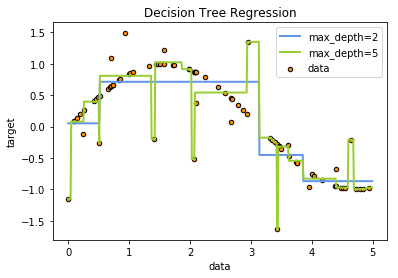

In [4]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

<a id='svm_regression'></a>
# SVM Regression
[Go to the top](#TOC)

Automatically created module for IPython interactive environment


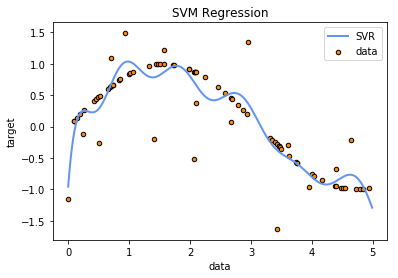

In [5]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
"""
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
"""
regr= svm.SVR(C=9000,cache_size=500,epsilon=0.2)
regr.fit(X,y)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_test= regr.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_test, color="cornflowerblue",
         label="SVR", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("SVM Regression")
plt.legend()
plt.show()

<a id="one_class"></a>
# One-class SVM
[Go to the top](#TOC)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)



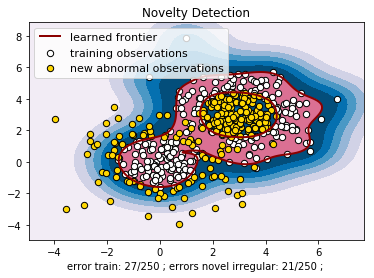

In [5]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
from sklearn.datasets import make_gaussian_quantiles


# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

W= np.c_[X,y]
# Generate train data

X_train = W[:,0:2][W[:,2]==0]
# Generate some regular novel observations
X_outliers = W[:,0:2][W[:,2]==1]

# fit the model
clf = svm.OneClassSVM(nu=0.1, cache_size=500,kernel="rbf",gamma='auto')
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
plt.legend([a.collections[0], b1,  c],
           ["learned frontier", "training observations",
            "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/250 ; errors novel irregular: %d/250 ; "
     % (n_error_train, n_error_outliers))
plt.show()